# Import all the libraries here

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data here

In [3]:
data = pd.read_csv("../data/amz_uk_price_prediction_dataset.csv")
df = data.copy()

# Explore the data

In [4]:
df.shape

(2443651, 9)

In [5]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [6]:
df.tail(4)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [10]:
df.isnull().sum() # amazon is very good in collecting data

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Part 1: Understanding Product Categories

## 1. Frequency Tables

In [15]:
frequency_category = df["category"].value_counts()

In [16]:
frequency_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [17]:
proportion_category = df["category"].value_counts(normalize=True)

In [18]:
df2 = pd.concat([frequency_category, proportion_category], axis=1)
df2

,count,proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766
...,...,...
Motorbike Chassis,107,0.000044
Alexa Built-In Devices,107,0.000044
Plugs,107,0.000044


In [28]:
# top five most listed product categories
df2.reset_index(inplace=True)
df2["category"][:5]

0                         Sports & Outdoors
1                                    Beauty
2    Handmade Clothing, Shoes & Accessories
3                               Bath & Body
4                            Birthday Gifts
Name: category, dtype: object

## Visualizations

In [35]:
# top ten categories
df2.drop(columns=["index"], inplace=True)
df2

,category,count,proportion
0,Sports & Outdoors,836265,0.342219
1,Beauty,19312,0.007903
2,"Handmade Clothing, Shoes & Accessories",19229,0.007869
3,Bath & Body,19092,0.007813
4,Birthday Gifts,18978,0.007766
...,...,...,...
291,Motorbike Chassis,107,0.000044
292,Alexa Built-In Devices,107,0.000044
293,Plugs,107,0.000044
294,Smart Home Security & Lighting,104,0.000043


In [44]:
top_ten_cat = df2.iloc[1:10]

In [45]:
top_ten_cat

,category,count,proportion
1,Beauty,19312,0.007903
2,"Handmade Clothing, Shoes & Accessories",19229,0.007869
3,Bath & Body,19092,0.007813
4,Birthday Gifts,18978,0.007766
5,Manicure & Pedicure Products,18940,0.007751
6,Skin Care,18769,0.007681
7,Make-up,18756,0.007675
8,Hair Care,18735,0.007667
9,Fragrances,18564,0.007597


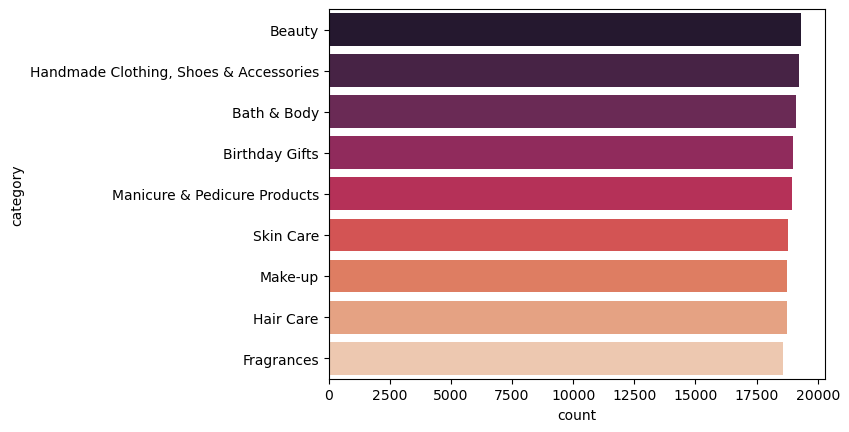

In [51]:
sns.barplot(data=top_ten_cat, x="count", y="category", palette="rocket", hue="category")
plt.show()

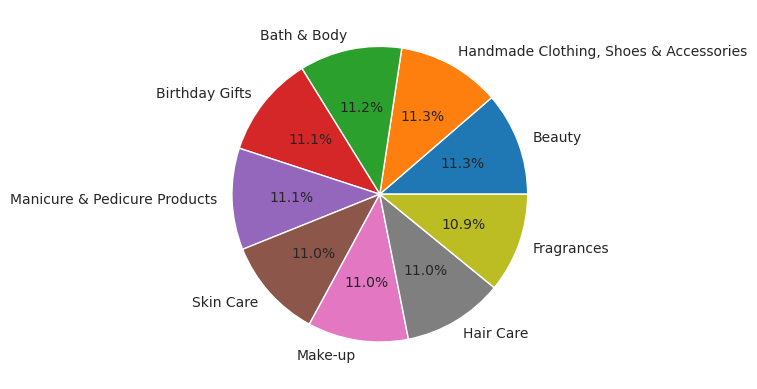

In [55]:
sns.set_style("whitegrid")
plt.pie(top_ten_cat["count"], labels=top_ten_cat["category"], autopct='%1.1f%%')
plt.show()
# no category dominates the listings for this subset

# Part 2: Delving into Product Pricing

In [56]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [61]:
# check the distribution of price first
speakers = df[df["category"] == "Hi-Fi Speakers"]
speakers.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


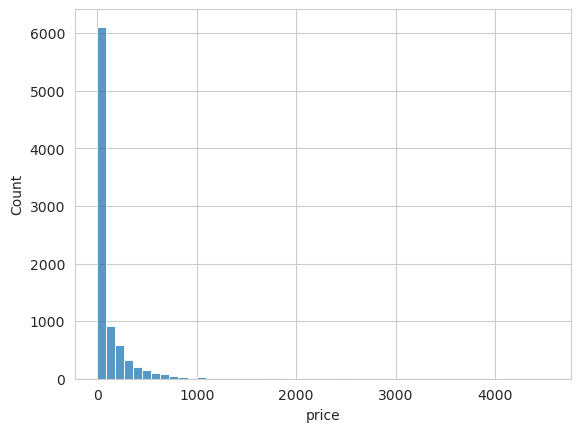

In [69]:
# check the distributions of speaker price
sns.histplot(speakers["price"], bins=50)
#plt.xlim(0, 100)
plt.show()

## Measures of Centrality

In [75]:
print(round(df["price"].mean(), 2)) # mean of price

89.24


In [79]:
df["price"].median() # median of price

np.float64(19.09)

In [81]:
df["price"].mode() # mode of price

0    9.99
Name: price, dtype: float64

The average price point of products is higher than the most common price point

## Measures of Dispersion

In [82]:
# variance
df["price"].var()

np.float64(119445.48532254907)

In [84]:
# standard deviation
df["price"].std()

np.float64(345.60886175349884)

In [85]:
# range
df["price"].max() - df["price"].min()

np.float64(100000.0)

In [87]:
# interquartile range
df["price"].quantile(0.75) - df["price"].quantile(0.25)

np.float64(36.0)

The standard deviation of the product prices is very high. 

In [88]:
print(f"Price variation around the mean: {df["price"].mean()} +- {df["price"].std()}")

Price variation around the mean: 89.24380943923663 +- 345.60886175349884


## Visualizations

In [90]:
df["price"].min()

np.float64(0.0)

In [91]:
df["price"].max()

np.float64(100000.0)

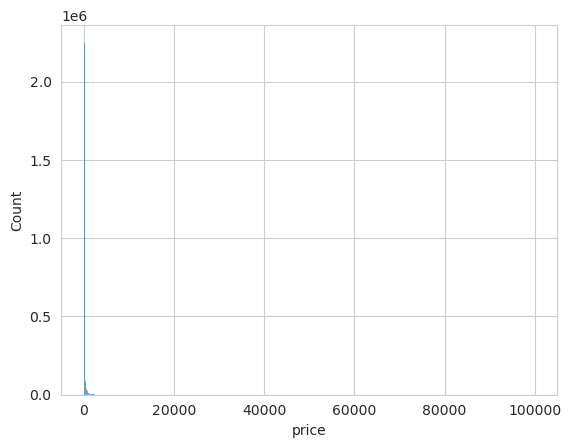

In [95]:
sns.histplot(data=df, x="price", bins=500) # it's hard to read the histogram
plt.show()

The price has a lot of outlier. That's why it's hard to plot the histogram.

To solve this, we can take an upper limit of the price and plot the histogram again

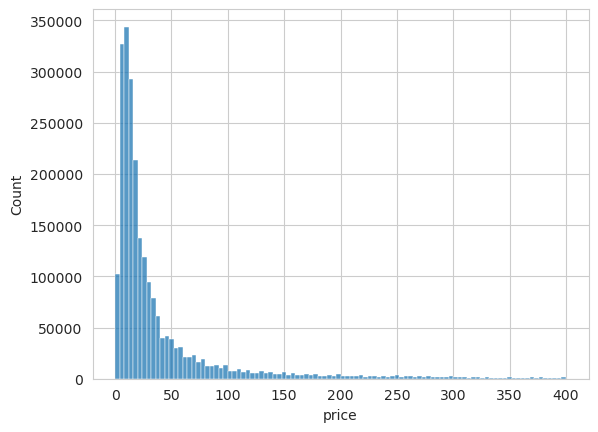

In [98]:
df3 = df[df["price"] <= 400]
sns.histplot(data=df3, x="price", bins=100)
plt.show() # the price distribution is right skewed

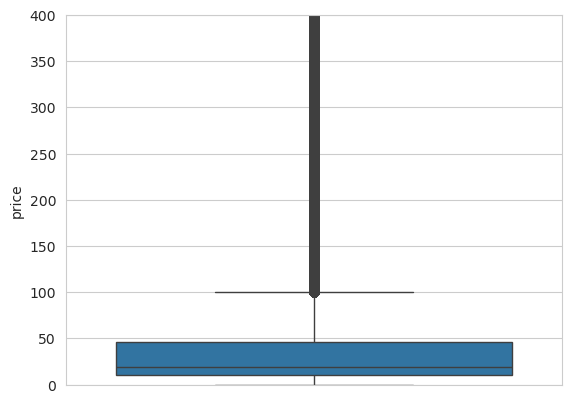

In [104]:
# box plot
sns.boxplot(data=df.price)
plt.ylim(0, 400)
plt.show()

There are lots of products which are priced significantly higher than the rest.

# Part 3: Unpacking Product Ratings

In [105]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [127]:
# ratings
df4 = pd.DataFrame(df["stars"].value_counts())

In [109]:
# mean
df["stars"].mean()

np.float64(2.152836472966065)

In [110]:
# median
df["stars"].median() # 50% of the customers rated 0

np.float64(0.0)

In [111]:
# mode
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

Amazon has a very bad rating on products

In [129]:
df4.reset_index(inplace=True)

In [130]:
df4

,stars,count
0,0.0,1225641
1,4.5,151577
2,4.6,136995
3,4.4,136165
4,5.0,128492
5,4.3,112564
6,4.7,94566
7,4.2,86871
8,4.0,66089
9,4.1,65115


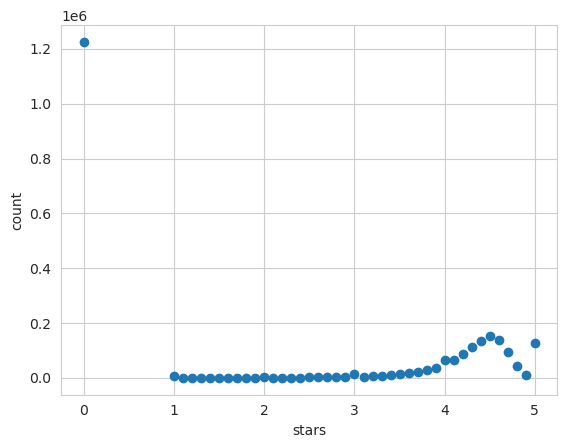

In [134]:
plt.plot(df4["stars"], df4["count"], ls=" ", marker="o",)
plt.xlabel("stars")
plt.ylabel("count")
plt.show()

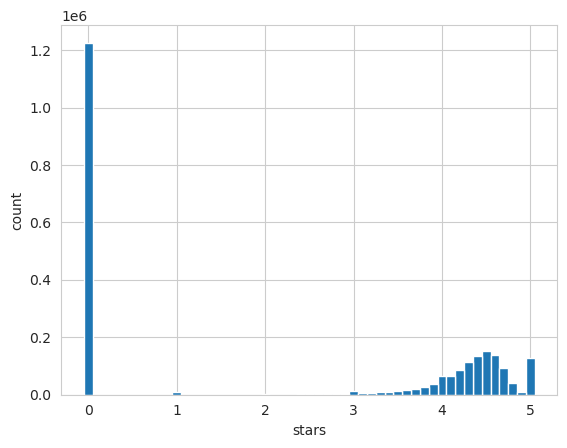

In [137]:
plt.bar(x=df4["stars"], height=df4["count"], width=0.1)
plt.xlabel("stars")
plt.ylabel("count")
plt.show()

Most of the customers either rates 0 or in between 3 to 5

In [138]:
# variance
df["stars"].var()

np.float64(4.817434029796862)

In [139]:
# std
df["stars"].std()

np.float64(2.1948653785134207)

In [140]:
# interquartile range
df["stars"].quantile(0.75) - df["stars"].quantile(0.25)

np.float64(4.4)

There is a wide variation in customer feedback

# Summarize

- We analyzed the top ten product categories. The category "Sports and Outdoors" outperforms other products.
- Top ten products are plotted using barplot and pie chart.
- The pricing of the products varies a lot as can be seen from the box plot. There are lots of outliers.
- On an average, the rating of the products is very bad. Most of the customers rated 0.